In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from shutil import copyfile

In [3]:
#writeIn('109').astype('int64').astype('str')[0]

In [4]:
#np.load('annotations/19_aro.npy')

#np.load('annotations/0_lnd.npy')

#np.load('annotations/0_val.npy')

path_img = 'train_set/images'
dir_list = os.listdir(path_img)
 
filenames = [".".join(f.split(".")[:-1]) for f in dir_list]
print(len(filenames))
dicti = {
    0: 'Neutral', 1: 'Happiness', 2: 'Sadness', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger',
7: 'Contempt', 8: None
}

dicti[int(np.load('train_set/annotations/78_exp.npy').astype('int64'))]

def arr2img(inp,df=None, patH=True):
    if patH:
        print(dicti[int(np.load('train_set/annotations/'+str(inp)+'_exp.npy').astype('int64'))])
        inp = 'train_set/images/'+str(inp)+'.jpg'
        return Image.fromarray(plt.imread(inp).reshape(1,-1)[0].reshape((224,224,3)))
    inp = df.loc[int(inp)]
    print(dicti[inp.values[-3]])
    inp = inp.values[:-3]
    return Image.fromarray(inp.reshape((224,224,3)).astype(np.uint8))

def writeIn(num,opt='exp'):
    #print(np.load('annotations/'+str(num)+'_'+str(opt)+'.npy'))
    return np.array([float(np.load('train_set/annotations/'+num+'_'+str(opt)+'.npy'))])

def add_imgs(s=0):
    n = len(filenames)
    for i in range(s,n):
        exp = writeIn(filenames[i]).astype('int64').astype('str')[0]
        src='train_set/images/'+filenames[i]+'.jpg'
        dst = 'dataset/'+exp+'/'+filenames[i]+'.jpg'
        copyfile(src,dst)
        print(str(i)+': Image : ',filenames[i],' is added\n---------------------------------')
    

287651


In [5]:
len(os.listdir('train_set/annotations'))/4

287651.0

Happiness


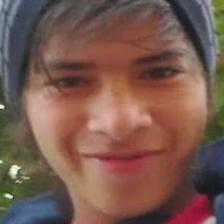

In [6]:
arr2img('109')

In [7]:
#add_row(df,0,'19')
#df.loc[0].values[:-3]

In [8]:
#arr2img(0,df,False)

In [12]:
add_imgs()

277463: Image :  7612  is added
---------------------------------
277464: Image :  238537  is added
---------------------------------
277465: Image :  376724  is added
---------------------------------
277466: Image :  16724  is added
---------------------------------
277467: Image :  174859  is added
---------------------------------
277468: Image :  283666  is added
---------------------------------
277469: Image :  345259  is added
---------------------------------
277470: Image :  153209  is added
---------------------------------
277471: Image :  316281  is added
---------------------------------
277472: Image :  298335  is added
---------------------------------
277473: Image :  154029  is added
---------------------------------
277474: Image :  145138  is added
---------------------------------
277475: Image :  151166  is added
---------------------------------
277476: Image :  180907  is added
---------------------------------
277477: Image :  225696  is added
-----------------

In [17]:
c = 0
for i in range(8):
    print(dicti[i],' ',len(os.listdir('dataset/'+str(i))))
    c+=len(os.listdir('dataset/'+str(i)))
print(c)

Neutral   74874
Happiness   134415
Sadness   25459
Surprise   14090
Fear   6378
Disgust   3804
Anger   24883
Contempt   3751
287654


No handles with labels found to put in legend.


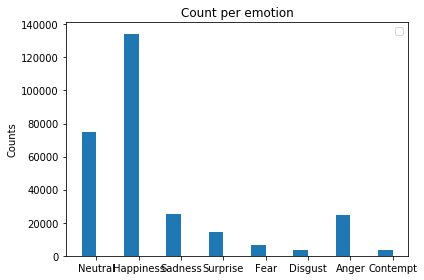

In [20]:
import matplotlib.pyplot as plt


labels = [dicti[i] for i in range(8)]
count = [len(os.listdir('dataset/'+str(i))) for i in range(8)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Count per emotion')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()